# Project : Mercedes-Benz Greener Manufacturing

DESCRIPTION : Reduce the time a Mercedes-Benz spends on the test bench.

For this project we will use jupyter notebook. The description of the steps that are used to solve this problem are given along with the code below.

In [1]:
# import the required libraries
import numpy as np # Numpy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib for visualization
%matplotlib inline
from sklearn.decomposition import PCA # Principal Component Analysis
from sklearn.model_selection import train_test_split # Train Test Split
from xgboost import XGBRegressor # XGBoost Regressor
from sklearn.metrics import mean_squared_error,r2_score # Model performance metrics

In [2]:
# Set working directory
import io
%cd "F:\Akshay\Simplilearn\Electives\Machine Learning\Projects\Mercedes-Benz Greener Manufacturing"

F:\Akshay\Simplilearn\Electives\Machine Learning\Projects\Mercedes-Benz Greener Manufacturing


In [3]:
# Read the train dataset
train = pd.read_csv('train.csv')
# First 5 records
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Read the test dataset
test = pd.read_csv('test.csv')
# First 5 records
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# Get the number of rows and columns in each dataframe
print(train.shape)
print(test.shape)

(4209, 378)
(4209, 377)


As we can see that there are 4209 rows in both train and test data and 378 columns in train and 377 columns in test data.

In [6]:
# Brief description of train data
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Brief description of test data
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Q.2 : Check for null and unique values for test and train sets.

In [8]:
train.isnull().sum().any()

False

In [9]:
test.isnull().sum().any()

False

# From above analysis we can see that there are no null values in train as well as test dataset

# Now we will look for the unique values that are present in each columns of the train and the test data

In [10]:
# Unique values for columns in train dataset
train_unique = train.dtypes.index
for i in train_unique:
    print(i,train[i].unique())

ID [   0    6    7 ... 8412 8415 8417]
y [130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10 [0 1]
X11 [0]
X12 [0 1]
X13

In [11]:
# Unique values for columns in test dataset
test_unique = test.dtypes.index
for i in test_unique:
    print(i,test[i].unique())

ID [   1    2    3 ... 8413 8414 8416]
X0 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
X1 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
X2 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
X3 ['f' 'a' 'c' 'e' 'd' 'g' 'b']
X4 ['d' 'b' 'a' 'c']
X5 ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
X8 ['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x']
X10 [0 1]
X11 [0 1]
X12 [0 1]
X13 [0 1]
X14 [0 1]
X1

So in above steps we extracted the columns and the unique values that are present in the train and test data.

# Q.3 : Apply label encoder.

Here we will apply label encoder for object datatype columns of both train and test data

In [12]:
# Creating a new variable for object columns in train data
objectcols_train = train[['X0','X1','X2','X3','X4','X5','X6','X8']]

In [13]:
# Dropping the object columns in train data
train = train.drop(['X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)

In [14]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# Applying Label Encoder on object columns
for i in objectcols_train:
    le.fit(objectcols_train[i])
    objectcols_train[i] = le.transform(objectcols_train[i])

In [16]:
# Take a look at object columns after label encoding
objectcols_train

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [17]:
# Joining the label encoded object columns back to the train data
train = pd.concat([train,objectcols_train],axis=1)
# First 5 records
train.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,32,23,17,0,3,24,9,14
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,32,21,19,4,3,28,11,14
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,20,24,34,2,3,27,9,23
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13


# Now we will label encode the object columns in the test data

In [18]:
# Creating a new variable for object columns in test dataset
objectcols_test = test[['X0','X1','X2','X3','X4','X5','X6','X8']]

In [19]:
# Dropping the object columns from the test data
test = test.drop(['X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)

In [20]:
# Importing the Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
# Applying Label encoder on object columns
for i in objectcols_test:
    le.fit(objectcols_test[i])
    objectcols_test[i] = le.transform(objectcols_test[i])

In [22]:
# Take a look at object columns after label encoding
objectcols_test

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [23]:
# Joining the label encoded object columns back to the test data
test = pd.concat([test,objectcols_test],axis=1)
# First 5 records
test.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,2,0,0,0,0,0,0,0,0,0,...,0,0,42,3,8,0,3,9,6,24
2,3,0,0,0,0,1,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9
3,4,0,0,0,0,0,0,0,0,0,...,0,0,21,13,34,5,3,31,11,13
4,5,0,0,0,0,1,0,0,0,0,...,0,0,45,20,17,2,3,30,8,12


Here we have successfully label encoded the object datatype columns in both train and test data and now our data is ready for further analysis.

# Q.1 : If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [24]:
# Creating new variables for independent columns and dependent column and also dropping ID column as it not necessary for 
# further analysis
X = train.drop(['ID','y'],axis=1)
y = train.y

In [25]:
# Now we will import Variance Threshold from sklearn that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0) # Threshold = 0 to remove columns which have 0 variance
var_thresh.fit(X)

VarianceThreshold(threshold=0)

In [26]:
# Get a mask, or integer index, of the features selected
X.columns[var_thresh.get_support()]

Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X384', 'X385', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],
      dtype='object', length=364)

In [27]:
# Now will store columns which have 0 variance in a new variable
constant_columns = [column for column in X.columns if column not in X.columns[var_thresh.get_support()]]
print(len(constant_columns)) # To check how many columns have 0 variance

12


In [28]:
# Getting the columns with 0 variance
for feature in constant_columns:
    print(feature)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


The columns mentioned above have 0 variance so we will drop them from X in the next step

In [29]:
# Removing the 0 variance columns from X
X = X.drop(constant_columns,axis=1)
X

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,32,23,17,0,3,24,9,14
1,0,0,0,0,0,0,0,1,0,0,...,0,0,32,21,19,4,3,28,11,14
2,0,0,0,0,0,0,1,0,0,0,...,0,0,20,24,34,2,3,27,9,23
3,0,0,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,8,20,16,2,3,0,3,16
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,31,16,40,3,3,0,7,7
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,8,23,38,0,3,0,6,4
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,9,19,25,5,3,0,11,20


# Now we will repeat the same procedure on test data

In [30]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0) # Threshold = 0 to remove columns which have 0 variance
var_thresh.fit(test)

VarianceThreshold(threshold=0)

In [31]:
# Get a mask, or integer index, of the features selected
test.columns[var_thresh.get_support()]

Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X384', 'X385', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],
      dtype='object', length=372)

In [32]:
# Now will store columns which have 0 variance in a new variable
constant_columns = [column for column in test.columns if column not in test.columns[var_thresh.get_support()]]
print(len(constant_columns)) # To check how many columns have 0 variance

5


In [33]:
# Getting the columns with 0 variance
for feature in constant_columns:
    print(feature)

X257
X258
X295
X296
X369


The columns mentioned above have 0 variance so we will drop them from test in the next step

In [34]:
# Removing the 0 variance columns from test data and also the ID column as it is not necessary for further analysis
test = test.drop(constant_columns,axis=1)
test = test.drop('ID',axis=1)
test

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,0,0,0,0,0,0,0,0,0,1,...,0,0,42,3,8,0,3,9,6,24
2,0,0,0,0,1,0,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,21,13,34,5,3,31,11,13
4,0,0,0,0,1,0,0,0,0,0,...,0,0,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0,0,6,9,17,5,3,1,9,4
4205,0,0,0,0,0,0,0,0,0,1,...,0,0,42,1,8,3,3,1,9,24
4206,0,0,0,0,1,0,0,0,0,0,...,0,0,47,23,17,5,3,1,3,22
4207,0,0,0,1,1,0,0,0,0,0,...,0,0,7,23,17,0,3,1,2,16


In [35]:
# Now we will check the dimensions of X,y and test data
print('X-Dimension : ',X.shape)
print('y-Dimension : ',y.shape)
print('test-Dimension : ',test.shape)

X-Dimension :  (4209, 364)
y-Dimension :  (4209,)
test-Dimension :  (4209, 371)


# From above we can see that the columns with 0 variance are removed from the train and test data

# Now as we can see that after label encoding some of the columns have high values compared to other and as we are applying PCA on our data so we need to scale the data for better analysis.

# For Scaling we will use the Standard Scaler from sklearn preprocessing

In [36]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [37]:
# Lets first apply Standard Scaler on X data
X['X0'] = SS.fit_transform(X[['X0']])
X['X1'] = SS.fit_transform(X[['X1']])
X['X2'] = SS.fit_transform(X[['X2']])
X['X3'] = SS.fit_transform(X[['X3']])
X['X4'] = SS.fit_transform(X[['X4']])
X['X5'] = SS.fit_transform(X[['X5']])
X['X6'] = SS.fit_transform(X[['X6']])
X['X8'] = SS.fit_transform(X[['X8']])

In [38]:
X.head() # First 5 records after scaling the data

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0.163012,1.393488,-0.028122,-1.678270,0.028938,1.292117,0.751787,0.339445
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0.163012,1.159021,0.155388,0.620969,0.028938,1.776974,1.437511,0.339445
2,0,0,0,0,0,0,1,0,0,0,...,0,0,-0.710560,1.510721,1.531709,-0.528650,0.028938,1.655760,0.751787,1.618389
3,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.710560,1.159021,1.531709,1.195779,0.028938,1.655760,1.437511,-1.081605
4,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.710560,1.393488,1.531709,1.195779,0.028938,-0.162454,-1.305384,0.197340


In [39]:
# Now we will apply Standard Scalar on test data
test['X0'] = SS.fit_transform(test[['X0']])
test['X1'] = SS.fit_transform(test[['X1']])
test['X2'] = SS.fit_transform(test[['X2']])
test['X3'] = SS.fit_transform(test[['X3']])
test['X4'] = SS.fit_transform(test[['X4']])
test['X5'] = SS.fit_transform(test[['X5']])
test['X6'] = SS.fit_transform(test[['X6']])
test['X8'] = SS.fit_transform(test[['X8']])

In [40]:
test.head() # First 5 records after scaling the data

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.625211,1.395760,1.586068,1.163082,0.036299,1.266652,-2.388888,1.488396
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0.754609,-0.945199,-0.956445,-1.651020,0.036299,-0.695011,-0.296602,1.773477
2,0,0,0,0,1,0,0,0,0,0,...,0,0,-0.625211,1.395760,-0.076345,1.163082,0.036299,-1.733538,0.749541,-0.364632
3,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.625211,0.225281,1.586068,1.163082,0.036299,1.843611,1.446970,0.205531
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0.951726,1.044616,-0.076345,-0.525379,0.036299,1.728219,0.400827,0.062990


# Q.4 : Perform dimensionality reduction

# We will use Principal Component Analysis (PCA) for dimensionality reduction.

# First we will find out the optimum number of components for PCA so that the accuracy of the model will be maximum

In [41]:
pca = PCA()

In [42]:
pca.fit(X)

PCA()

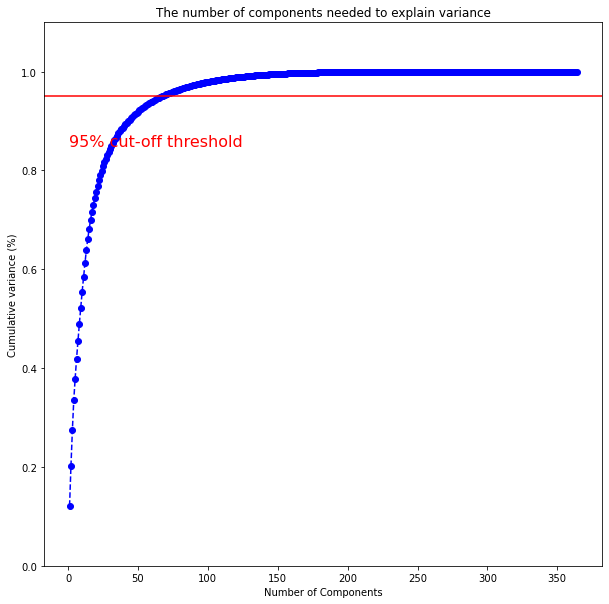

In [43]:
# Plotting the graph for optimum number of components
x_comp = np.arange(1, 365, step=1)
y_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,10))
plt.ylim(0.0,1.1)
plt.plot(x_comp, y_var, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# It looks that for 95% we need the number of components between 60 to 70. So we will check the accuracy as well as RMSE and R2_Score of our model by using n_components as 0.95 components and we will use that to predict on the test data

In [44]:
# Using PCA with (n_components=0.95)
pca = PCA(n_components=0.95,svd_solver='auto')

In [45]:
# fitting PCA on X
pca.fit(X)

PCA(n_components=0.95)

In [46]:
# Creating a new varible for transformed data
X_transformed = pd.DataFrame(pca.transform(X))

In [47]:
# Get the dimension of transformed data
X_transformed.shape

(4209, 68)

In [48]:
# First 5 records
X_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.313973,2.189802,2.117590,-0.065338,1.298016,-0.081501,0.190846,-1.591178,-0.437270,1.131222,...,-0.297913,0.929550,-0.319356,0.931352,-0.076276,-0.575444,0.440940,-0.838668,-0.085493,0.667954
1,-0.784066,-0.695754,1.208709,-0.239862,0.367869,-1.192245,-0.047564,-1.964055,-0.646133,1.676034,...,-0.103446,0.373455,0.147724,0.167174,0.102862,-0.129509,0.027811,0.608265,0.178951,0.521440
2,-1.944348,2.050056,2.924898,1.776213,-0.287656,-1.373386,3.786533,-0.623482,-0.481827,0.258289,...,-0.191323,-0.093491,-0.171269,0.281752,0.209978,-0.221387,0.612498,-0.008869,-0.410241,0.615604
3,-1.934820,0.822778,3.037489,2.956736,-1.455696,-2.191549,1.604562,-0.546356,-0.079549,0.036500,...,-0.109367,-0.015207,-0.163451,-0.125693,0.282807,-0.164504,0.019466,0.401063,0.088075,0.064961
4,-2.169094,0.603654,3.131980,2.602855,-1.551850,-1.665966,2.373468,1.302750,0.760940,-1.019324,...,0.041649,0.001472,0.133435,0.052521,0.324992,0.005248,0.094059,-0.080009,-0.012759,0.107031


In [49]:
# fitting PCA on test
pca.fit(test)
test_transformed = pd.DataFrame(pca.transform(test))

In [50]:
# Get dimension of the transformed data
test_transformed.shape

(4209, 68)

In [51]:
# First 5 Records
test_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-1.891260,0.344538,3.466406,1.917411,-1.317323,-1.686398,-0.947895,3.963974,-0.177529,-1.477851,...,-0.029105,0.266649,-0.014142,0.153464,-0.301432,0.242060,0.168516,-0.026124,-0.180617,0.199749
1,4.175087,1.310735,0.527854,-1.034485,1.514685,1.445055,-0.161502,1.086963,-0.593352,1.222311,...,0.104767,0.048484,0.164372,0.017628,-0.116405,-0.026381,-0.155347,-0.017147,-0.001466,0.119408
2,-1.988420,0.198563,1.101566,0.945251,-0.008231,-0.617490,0.346186,1.656466,-2.674321,0.154451,...,-0.351260,0.098849,0.028724,0.407329,-0.087659,0.376881,0.319610,-0.313608,-0.092943,-0.182224
3,-1.296248,0.177314,2.940011,2.862125,-1.486869,-2.194655,-1.761780,2.097380,-1.078638,0.017821,...,0.037204,0.215851,-0.043258,0.103153,-0.119684,0.010543,0.050282,0.016370,0.049161,0.083008
4,-2.250654,0.507154,-1.602801,-1.648139,0.999834,-0.988460,-1.399337,-0.222853,0.729902,0.233054,...,0.290015,-0.059532,0.149463,0.028351,-0.092650,-0.031882,-0.070419,-0.099681,-0.101528,0.084126


# As we can see that we need 68 columns in our data for accuracy to be 95% 

# Q.5 : Predict your test_df values using XGBoost.

In [52]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3156, 68)
(1053, 68)
(3156,)
(1053,)


In [54]:
XGB = XGBRegressor(learning_rate=0.01,n_estimators=5000,max_depth=4,min_child_weight=2, gamma=0, subsample=0.8,
                   colsample_bytree=0.8,reg_alpha=0.005,seed=27)

In [55]:
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
print(XGB.score(X_train,y_train))

0.9448161061087406


In [56]:
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred))

RMSE : 9.675352519706323
R2 Score : 0.41100341473522095


# From above analysis we can see that the model score is very good i.e.94.48% and RMSE is also small i.e 9.675 however the R2 Score is 0.411 which is somewhat good.

In [57]:
train_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
train_pred.head(15)

,Actual,Predicted
1073,97.94,95.233414
144,96.41,94.641479
2380,105.83,112.940292
184,79.09,77.344017
2587,108.69,113.367981
2768,94.60,97.796158
3697,84.48,95.543823
999,110.24,100.071259
2856,120.80,103.273911
2862,122.66,113.642799


# Above table gives us a good comparison of Actual Vs Predicted values and we can see that the our model has good accuracy. 

# Now we will predict the values based on the test data

In [58]:
predicted = XGB.predict(test_transformed)
predicted[:50]

array([ 97.41057 , 103.53869 , 101.74826 ,  89.42028 , 118.691986,
        90.39269 , 107.90589 ,  92.42134 , 125.274605,  94.78106 ,
       123.88641 , 100.424355,  98.00963 ,  95.41308 ,  99.21417 ,
        98.58869 , 119.192375,  97.81834 ,  99.33622 ,  97.318634,
        97.81834 ,  97.81834 ,  93.92864 ,  98.51028 ,  89.59668 ,
       123.568924, 100.40258 ,  97.91276 , 101.41077 , 106.394   ,
       108.470695,  97.06113 , 113.44989 , 101.702225, 106.02058 ,
       100.609634,  91.60046 ,  98.73547 ,  95.237465,  99.91412 ,
       101.35742 ,  97.4928  , 104.141014, 103.477325, 122.714714,
       103.47554 ,  98.73547 ,  99.49108 , 109.68202 , 106.07846 ],
      dtype=float32)

# Above array gives the first 50 predicted values on the test data

# Summary :
# 1. We checked our data for columns that have zero variance and we found that there are 12 columns in the train data and 5 columns in the test data having a zero variance and we removed those for analysis purpose.
# 2. There were no null values in the train as well as test dataset and we also extracted unique values of the columns in train and test data.
# 3. We also applied Label Encoder on object datatype columns of train and test data and converted them to numeric for analysis purpose
# 4. We scaled our train and test data and also performed dimensionality reduction using Principal Component Analysis (PCA) we found out 68 features are necessary to achieve 95% accuracy
# 5. We used XGBoost Regressor and we got a pretty good accuracy and low RMSE on our model and we also predicted values on test data.